# Assignment 6
### Do Question 6, and three more questions of your choice.

**Authors**: Isaac Tabor and Lucas Rayder



### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

Three-sided die:
- The outcomes for rolling a three-sided die are: {1,2,3}
- The set of all events is S = {{∅}, {1}, {2}, {3}, {1,2}, {1,3}, {2,3}, {1,2,3}}
- The probablity of each event is (0, 1/3, 1/3, 1/3, 2/3, 2/3, 2/3, 1)

Fair Coin:
- The outcomes for flipping a fair coin twice are: {HH, TH, HT, TT}
- The set of all events is S = {{∅}, {HH}, {TH}, {HT}, {TT}, {HH, TH}, {HH, HT}, {HH, TT}.
                                {TH, HT}, {TH, TT}, {HT, TT}, {HH, HT, TH}, {HH, HT, TT}, 
                                {HT, TH, TT}, {HT, TH, TT}, 
                                {HH, HT, TH, TT}}
- The probability of all the events is: (0, 1/4, 1/4, 1/4, 1/4, 1/2, 1/2, 1/2, 
                                        1/2, 1/2, 1/2, 3/4, 3/4
                                        3/4, 3/4,
                                        1)

Rolling three-sided die twice:
- The possible outcomes are: O = {2, 3, 4, 5, 6}
- As stated, there are 2^5 or 32 events.
- The events look like combinations of 1, 2, and 3, which each add up to the outcomes in the event space. 
    - {{∅}, {1,1}, {1,2}, {1,3}, {2,2}...}



### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

#### Spinning the roulette wheel

In [171]:
import random
import numpy as np
import pandas as pd

def spin_wheel():
    numbers = list(range(37))
    colors = ['green', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black',
          'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 'red', 'black',
          'red', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'black', 'red',
          'black', 'red', 'black', 'red', 'black', 'red']
    roulettedf = pd.DataFrame({'number': numbers, 'color': colors})

    spin = random.randrange(0, 37)
    spin_result = roulettedf.iloc[spin]
    #print(f"Spin result: \n{spin_result['number']}, {spin_result['color']}")
    return int(spin_result['number']), spin_result['color']

spin_wheel()

(6, 'black')

#### Describing the probability space:

Outcomes:
- The outcomes are simply each "row" of the roulette dataframe, since each number is associated with a color.
- This means there are 37 total outcomes.
- The possible outcomes are {{0, green}, {1,red}, {2,black}, {3, red}, ...}

Events:
- There can be any combination of numbers on the roulette table as an event, which means there can be just a single number or even all the numbers together.
    - Note: Colors are associated with the numbers, so I didn't mention them here.
- For example, the event space set looks like { {∅}, {0}, {1}, {2}, ..., {0, 1}, {0,2}, {0,3} ..., {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36} }
    - Again, colors are associated with each of the above numbers but not mentioned here.


Probabilities:
- The probability of any number is 1/37, since it can be any number from 0 to 36.
- The probability of red or black is 18/37, but the probability of green is 1/37.
- The probability of either even or odd is 18/37 since 0 is not included in either for roulette.

#### Placing a bet:

In [172]:
def place_bet(bets):
    '''
    Takes a list as an argument
    If the bet hits, returns: 'Win', payout amount
    If the bet loses, returns: 'Loss', -1
    '''

    payout = 0

    # Spin the wheel
    number, color = spin_wheel()

    for bet in bets:
        #print('For your bet:', str(bet))
        # Determine if the bet hits
        winning_bet_type = None
        if bet == number:
            winning_bet_type = "number"
        elif bet == color:
            winning_bet_type = "color"
        elif bet == "even" and number % 2 == 0 and number != 0:
            winning_bet_type = "even"
        elif bet == "odd" and number % 2 == 1:
            winning_bet_type = "odd"

        # Did the bet hit?
        if winning_bet_type == None:
            #print(f'Your bet {bet} lost.')
            payout -= 1
            continue

        #print('Your bet won!')
        
        # Determine K
        K=0
        # for color bets
        if winning_bet_type == "color" and color!="green":
            K += 18
        if winning_bet_type == "color" and "green" in bet:
            K += 1
        # for even/odd bets
        if winning_bet_type == "even" or winning_bet_type == "odd":
            K += 18
        # for number bets
        if winning_bet_type == "number":
            K += 1

        payout += (36 / K ) - 1
    
    if payout > 0:
        return 'Win', payout
    else:
        return 'Loss', payout
    
place_bet([1,2,3,4,'red', 'even'])

('Loss', -4.0)

#### Betting on red

In [173]:
amt1 = 0
for i in range(1000):
    WL, payout = place_bet(['red'])
    amt1 += payout

print('\n-----------------------\nAfter 1000 bets on red:', amt1,'\n-----------------------')
print(f'Average payout: {amt1/1000}')


-----------------------
After 1000 bets on red: -24.0 
-----------------------
Average payout: -0.024


#### Betting on odd

In [174]:
amt2 = 0
for i in range(1000):
    WL, payout = place_bet(['odd'])
    amt2 += payout

print('\n-----------------------\nAfter 1000 bets on odd:', amt2,'\n-----------------------')
print(f'Average payout: {amt2/1000}')


-----------------------
After 1000 bets on odd: -60.0 
-----------------------
Average payout: -0.06


#### Betting on 7

In [175]:
amt3 = 0
for i in range(1000):
    WL, payout = place_bet([7])
    amt3 += payout

print('\n-----------------------\nAfter 1000 bets on 7:', amt3,'\n-----------------------')
print(f'Average payout: {amt3/1000}')


-----------------------
After 1000 bets on 7: 116.0 
-----------------------
Average payout: 0.116


#### Betting on a split

In [176]:
amt4 = 0
for i in range(1000):
    WL, payout = place_bet([6,7])
    amt4 += payout

print('\n-----------------------\nAfter 1000 bets on a line (6 and 7):', amt4,'\n-----------------------')
print(f'Average payout: {amt4/1000}')


-----------------------
After 1000 bets on a line (6 and 7): -452.0 
-----------------------
Average payout: -0.452


Betting on a line AND the average payout

In [177]:
amt5 = 0
for i in range(1000):
    WL, payout = place_bet([1,2,3,4,5,6])
    amt5 += payout

print('\n-----------------------\nAfter 1000 bets on a line (6 and 7):', amt5,'\n-----------------------')
print(f'Average payout: {amt5/1000}')


-----------------------
After 1000 bets on a line (6 and 7): -1104.0 
-----------------------
Average payout: -1.104


### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$


A distribution function has the properties that:
1. As x approaches -infinity, F(x) approaches 0, and as x approaches infinity, F(x) approaches 1. 
2. Non-decreasing F(x1​)≤F(x2​)for all x1​<x2
3. Right-continuous

This one satisfies all properties and therefore is a distirbution function. 

It's density function is its derivative: 

$
f(x) =
\begin{cases}
0, & x < 0 \\
\dfrac{1}{2\sqrt{x}}, & 0 < x < 1 \\
0, & x > 1
\end{cases}
$

/tmp/ipykernel_30973/180118047.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.where((x > 0) & (x < 1), 1/(2*np.sqrt(x)), 0)


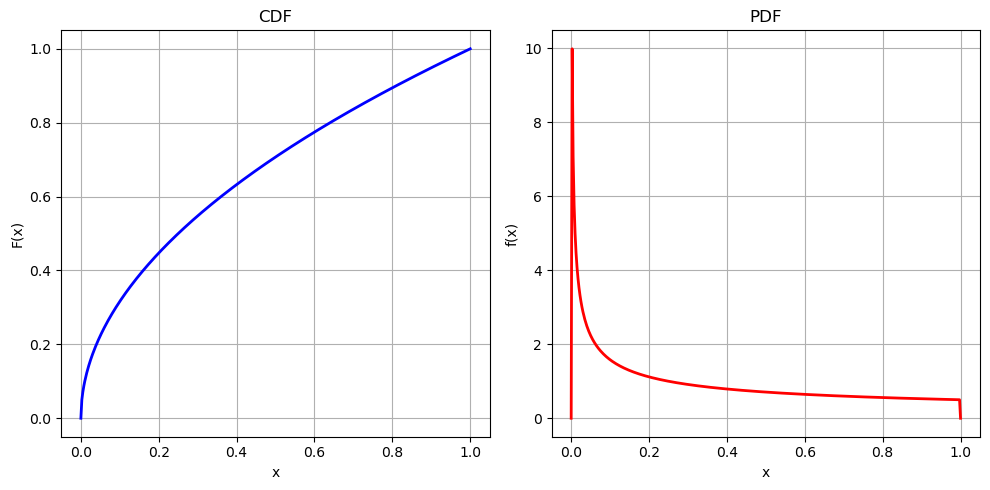

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CDF
def F(x):
    return np.where(x < 0, 0, np.where(x <= 1, np.sqrt(x), 1))

# Define the PDF
def f(x):
    return np.where((x > 0) & (x < 1), 1/(2*np.sqrt(x)), 0)

# Create a range of x values
x = np.linspace(0, 1, 400)

# Compute CDF and PDF values
cdf_values = F(x)
pdf_values = f(x)

# Plot
plt.figure(figsize=(10,5))

# CDF
plt.subplot(1, 2, 1)
plt.plot(x, cdf_values, color='blue', lw=2)
plt.title('CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

# PDF
plt.subplot(1, 2, 2)
plt.plot(x, pdf_values, color='red', lw=2)
plt.title('PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


2. $F(x) = \dfrac{1}{1+e^{-x}}$


A distribution function has the properties that:
1. As x approaches -infinity, F(x) approaches 0, and as x approaches infinity, F(x) approaches 1. 
2. Non-decreasing F(x1​)≤F(x2​)for all x1​<x2
3. Right-continuous

- this satisfies all 3 of those.

**Derivative**

Step 1: Rewrite using a power form for the chain rule:
$
F(x) = (1 + e^{-x})^{-1}.
$

Step 2: Let  $u = 1 + e^{-x}$, so that $F(x) = u^{-1}$


Step 3: Compute derivative of  u  with respect to  x:
$
\frac{du}{dx} = \frac{d}{dx}(1 + e^{-x}) = -e^{-x}.
$

Step 4: Apply the chain rule:
$
F'(x) = \frac{d}{dx} (u^{-1}) = -u^{-2} \cdot \frac{du}{dx} = - (1 + e^{-x})^{-2} \cdot (- e^{-x}) = \frac{e^{-x}}{(1 + e^{-x})^2}.
$

Step 5: Simplification in terms of F(x):
$
F(x) = \frac{1}{1 + e^{-x}} \implies 1 - F(x) = \frac{e^{-x}}{1 + e^{-x}},
$
so
$
F'(x) = F(x) \cdot (1 - F(x)).
$

Final Answer:
$
\boxed{f(x) = F'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}}.
$


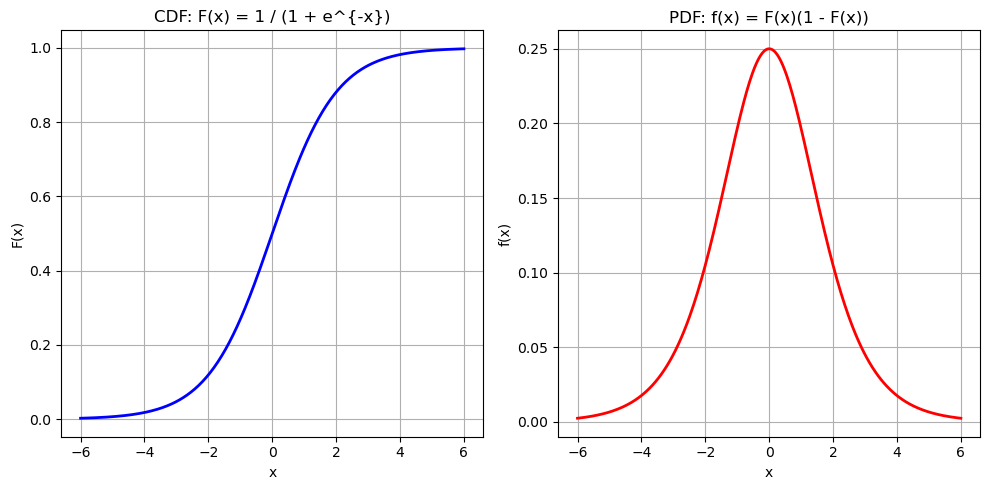

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CDF
def F(x):
    return 1 / (1 + np.exp(-x))

# Define the PDF
def f(x):
    return F(x) * (1 - F(x))

# Create a range of x values
x = np.linspace(-6, 6, 400)

# Compute CDF and PDF values
cdf_values = F(x)
pdf_values = f(x)

# Plot
plt.figure(figsize=(10,5))

# CDF
plt.subplot(1, 2, 1)
plt.plot(x, cdf_values, color='blue', lw=2)
plt.title('CDF: F(x) = 1 / (1 + e^{-x})')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

# PDF
plt.subplot(1, 2, 2)
plt.plot(x, pdf_values, color='red', lw=2)
plt.title('PDF: f(x) = F(x)(1 - F(x))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$

^ I am assuming a typo, and that is should be a<c<b because for c<x<b to be valid, b>c

A distribution function has the properties that:
1. As x approaches -infinity, F(x) approaches 0, and as x approaches infinity, F(x) approaches 1. 
2. Non-decreasing F(x1​)≤F(x2​)for all x1​<x2
3. Right-continuous

- This also satisfies all conditions

**Derivative:**

$f(x) = 
\begin{cases}
\dfrac{2(x-a)}{(b-a)(c-a)}, & a < x < c,\\[2mm]
\dfrac{2(b-x)}{(b-a)(b-c)}, & c < x < b,\\[1mm]
0, & \text{otherwise.}
\end{cases}
$

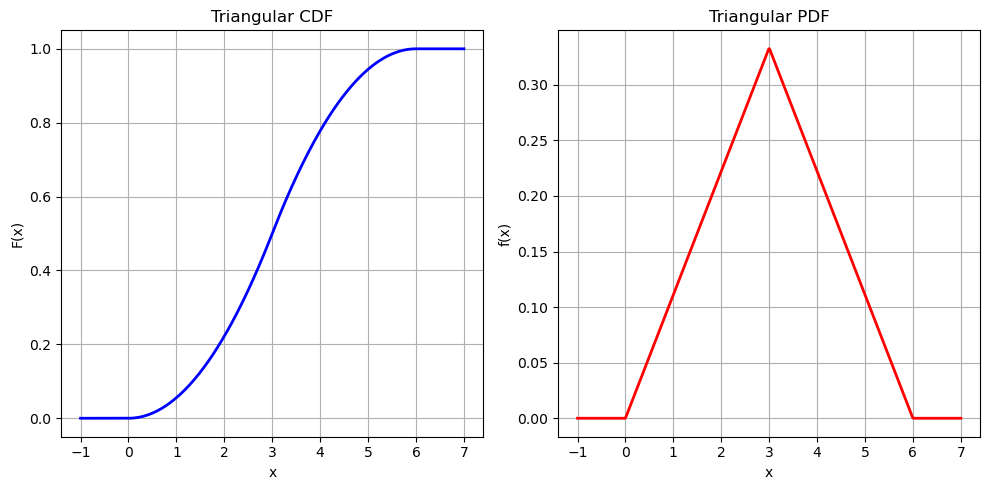

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the triangular distribution
a, c, b = 0, 3, 6  # a < c < b

# CDF
def F(x):
    return np.piecewise(x,
                        [x <= a, (x > a) & (x <= c), (x > c) & (x < b), x >= b],
                        [0,
                         lambda x: ((x - a)**2) / ((b - a)*(c - a)),
                         lambda x: 1 - ((b - x)**2) / ((b - a)*(b - c)),
                         1])

# PDF
def f(x):
    return np.piecewise(x,
                        [x <= a, (x > a) & (x <= c), (x > c) & (x < b), x >= b],
                        [0,
                         lambda x: 2*(x - a)/((b - a)*(c - a)),
                         lambda x: 2*(b - x)/((b - a)*(b - c)),
                         0])

# x values
x = np.linspace(-1, 7, 500)

# Compute values
F_vals = F(x)
f_vals = f(x)

# Plot
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x, F_vals, color='blue', lw=2)
plt.title('Triangular CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, f_vals, color='red', lw=2)
plt.title('Triangular PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$


- this also satisfies all 3 condition so it is a distributino function.

**Derivative (PDF):**

$
f(x) =
\begin{cases}
e^{-x}, & x \ge 0,\\
0, & x < 0.
\end{cases}
$


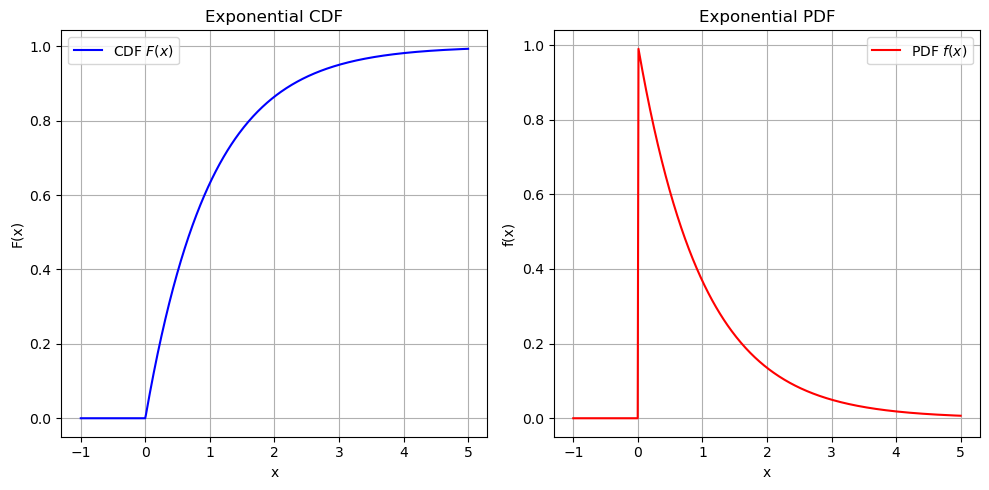

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-1, 5, 500)

# Exponential CDF
F_x = np.where(x >= 0, 1 - np.exp(-x), 0)

# Exponential PDF
f_x = np.where(x >= 0, np.exp(-x), 0)

# Plot
plt.figure(figsize=(10,5))

# Plot CDF
plt.subplot(1, 2, 1)
plt.plot(x, F_x, label='CDF $F(x)$', color='blue')
plt.title('Exponential CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

# Plot PDF
plt.subplot(1, 2, 2)
plt.plot(x, f_x, label='PDF $f(x)$', color='red')
plt.title('Exponential PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

- this also satisfies all 3 conditions.

**Derivative**:
F′(x)=1,0<x<1; elsewhere, 0

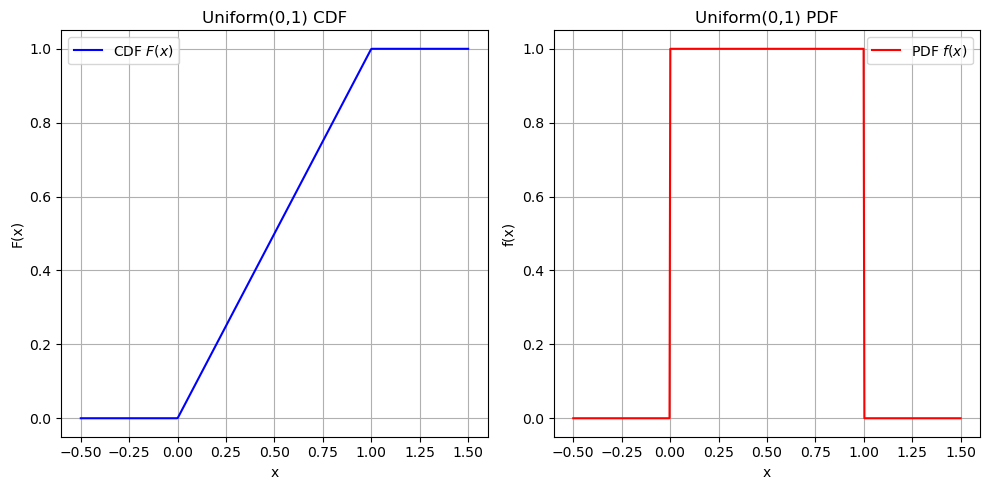

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-0.5, 1.5, 500)

# Uniform(0,1) CDF
F_x = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1], [0, lambda x: x, 1])

# Uniform(0,1) PDF
f_x = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1], [0, 1, 0])

# Plot
plt.figure(figsize=(10,5))

# Plot CDF
plt.subplot(1, 2, 1)
plt.plot(x, F_x, label='CDF $F(x)$', color='blue')
plt.title('Uniform(0,1) CDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

# Plot PDF
plt.subplot(1, 2, 2)
plt.plot(x, f_x, label='PDF $f(x)$', color='red')
plt.title('Uniform(0,1) PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.




In [183]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic

## Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.

- **Support:** $x \in (-\infty, \infty)$

    - Because the CDF is technically always increasing (shown below), and looking at the equaiton, as x approaches $-\infty$, the denominator approaches $\infty$, so the value overall approaches 0, and inversely as x approaches $\infty$, the denominator will be 1 + e^{-\infty}, which is like 1+0, so it approaches 1, which is nonzero. 

**Derivative of CDF to PDF**

**Logistic CDF (given)**

$
F(x;\sigma)=\frac{1}{1+e^{-x/\sigma}}\qquad \sigma>0.
$

**F as a power:**

$
F(x;\sigma)=\bigl(1+e^{-x/\sigma}\bigr)^{-1}.
$

Differentiate using the chain rule; 

$
\frac{dy}{dx} = f'(g(x)) \cdot g'(x)
$



$
\begin{aligned}
f(x;\sigma)=\frac{d}{dx}F(x;\sigma)
&= \frac{d}{dx}\bigl(1+e^{-x/\sigma}\bigr)^{-1} \\
&= -1\cdot\bigl(1+e^{-x/\sigma}\bigr)^{-2}\cdot\frac{d}{dx}\bigl(1+e^{-x/\sigma}\bigr)
\qquad\text{(chain rule)}\\[6pt]
&= -\bigl(1+e^{-x/\sigma}\bigr)^{-2}\cdot\bigl(e^{-x/\sigma}\cdot(-\tfrac{1}{\sigma})\bigr)
\qquad\text{(derivative of }e^{-x/\sigma}\text{)}\\[6pt]
&= \frac{e^{-x/\sigma}}{\sigma\bigl(1+e^{-x/\sigma}\bigr)^{2}}.
\end{aligned}
$

^^ Derivative of cdf is pdf 

**Plot of the density and distribution of a logistic distribution with different scale parameters**

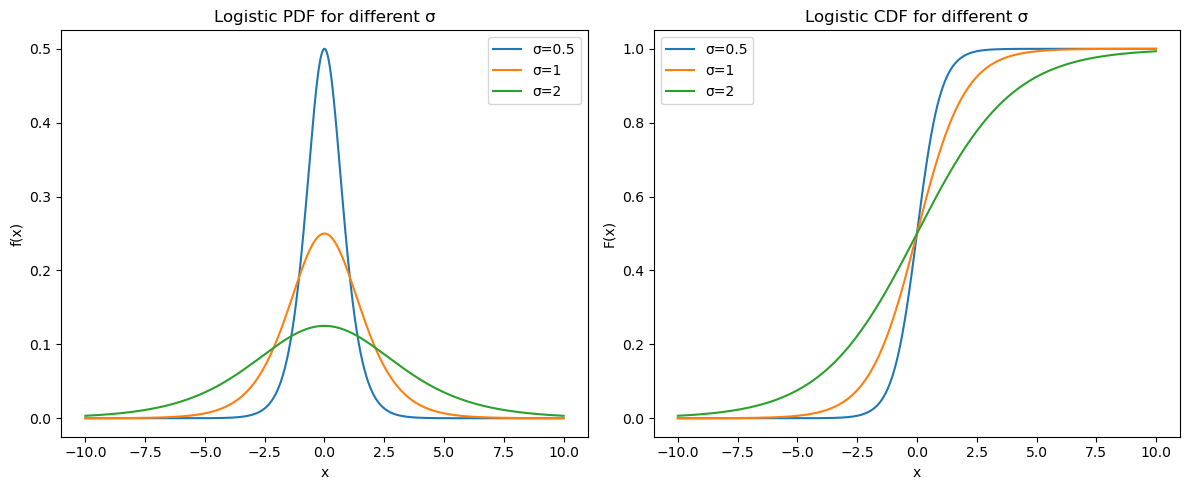

In [184]:
## Plot of the density and distribution of a logistic distribution with different scale parameters


# Define x-values
x = np.linspace(-10, 10, 1000)

# Logistic PDF
def logistic_pdf(x, sigma):
    return np.exp(-x/sigma) / (sigma * (1 + np.exp(-x/sigma))**2)

# Logistic CDF
def logistic_cdf(x, sigma):
    return 1 / (1 + np.exp(-x/sigma))

# Different scale parameters
sigmas = [0.5, 1, 2]

plt.figure(figsize=(12,5))

# Plot PDFs
plt.subplot(1,2,1)
for sigma in sigmas:
    plt.plot(x, logistic_pdf(x, sigma), label=f'σ={sigma}')
plt.title('Logistic PDF for different σ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Plot CDFs
plt.subplot(1,2,2)
for sigma in sigmas:
    plt.plot(x, logistic_cdf(x, sigma), label=f'σ={sigma}')
plt.title('Logistic CDF for different σ')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.tight_layout()
plt.show()


**Sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, with plot a KDE and ECDF, visually comparing with the theoretical pdf/cdf**

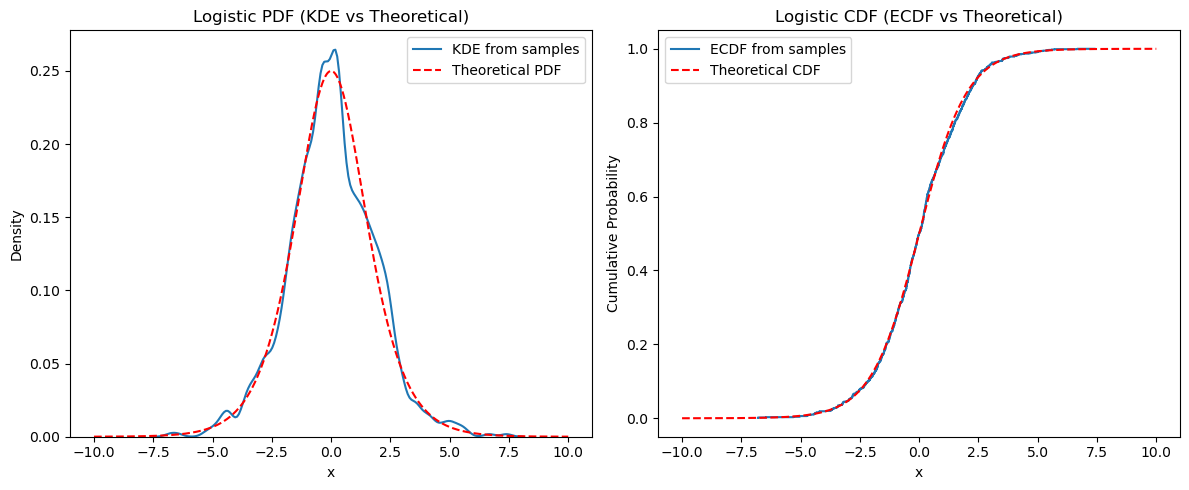

In [185]:
# Parameters
sigma = 1  # scale parameter
n_samples = 1000

# Generate 1000 random draws from logistic distribution
# scipy's loc=0, scale=sigma matches your F(x; sigma)
samples = logistic.rvs(loc=0, scale=sigma, size=n_samples)

# Define x-values for plotting theoretical curves
x = np.linspace(-10, 10, 1000)
pdf_theoretical = logistic.pdf(x, loc=0, scale=sigma)
cdf_theoretical = logistic.cdf(x, loc=0, scale=sigma)

# Plot KDE (estimate of PDF) and theoretical PDF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(samples, bw_adjust=0.5, label='KDE from samples')
plt.plot(x, pdf_theoretical, 'r--', label='Theoretical PDF')
plt.title('Logistic PDF (KDE vs Theoretical)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Plot ECDF (estimate of CDF) and theoretical CDF
plt.subplot(1,2,2)
# ECDF
sorted_samples = np.sort(samples)
ecdf = np.arange(1, n_samples+1)/n_samples
plt.step(sorted_samples, ecdf, label='ECDF from samples')
plt.plot(x, cdf_theoretical, 'r--', label='Theoretical CDF')
plt.title('Logistic CDF (ECDF vs Theoretical)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

## Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

**Support:**

$\text{Support: } x \in [0, \infty)$
- This makes sense because the exponential distrubtion models time until an event occurs, so it does not make sense to have negative wait times and you can see in the CDF function that it is only defined for x > 0


**Plot of pdf and cdf for different parameter values**

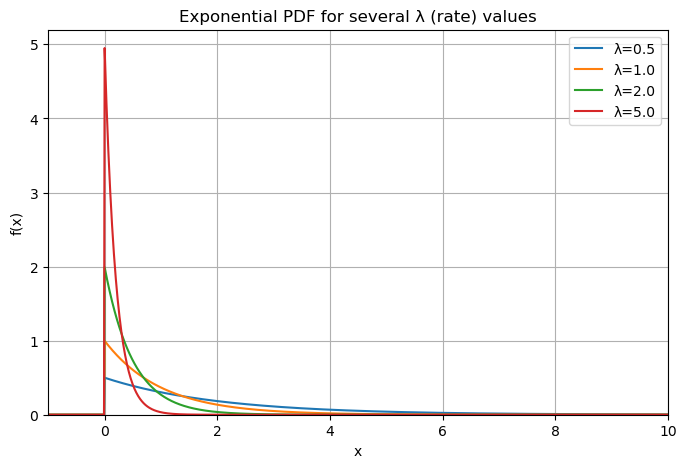

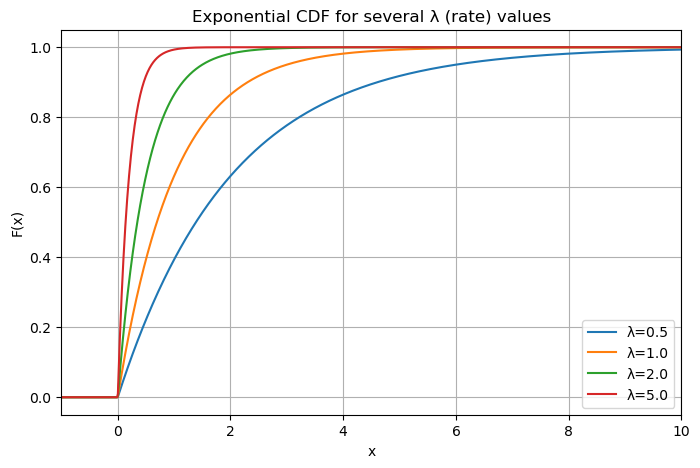

In [186]:
# Parameters and x-grid
lambdas = [0.5, 1.0, 2.0, 5.0]  # different rate parameters to compare
x = np.linspace(-1, 10, 1000)   # include a small negative region to show zero density there

def exp_pdf(x, lam):
    # PDF: lambda * exp(-lambda x) for x >= 0, 0 for x < 0
    pdf = np.where(x >= 0, lam * np.exp(-lam * x), 0.0)
    return pdf

def exp_cdf(x, lam):
    # CDF: 0 for x < 0, 1 - exp(-lambda x) for x >= 0
    cdf = np.where(x >= 0, 1 - np.exp(-lam * x), 0.0)
    return cdf

# Plot PDFs (one figure)
plt.figure(figsize=(8,5))
for lam in lambdas:
    plt.plot(x, exp_pdf(x, lam), label=f'λ={lam}')
plt.title('Exponential PDF for several λ (rate) values')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-1, 10)
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()

# Plot CDFs (separate figure)
plt.figure(figsize=(8,5))
for lam in lambdas:
    plt.plot(x, exp_cdf(x, lam), label=f'λ={lam}')
plt.title('Exponential CDF for several λ (rate) values')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim(-1, 10)
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()


**Derivative of CDF to PDF**

Exponential CDF

$
F(x,\lambda) = 1 - e^{-\lambda x}, \qquad x \ge 0, \; \lambda > 0
$

Chain rule setup

Differentiate using the chain rule:

$
\frac{dy}{dx} = f'(g(x)) \cdot g'(x)
$

$
\begin{aligned}
f(x;\lambda) &= \frac{d}{dx} F(x,\lambda) \\
&= \frac{d}{dx} \bigl(1 - e^{-\lambda x} \bigr) \\
&= -1 \cdot \frac{d}{dx} \bigl( e^{-\lambda x} \bigr) \qquad \text{(chain rule)} \\[2mm]
&= - \bigl( -\lambda e^{-\lambda x} \bigr) \qquad \text{(derivative of } e^{-\lambda x}\text{)} \\[1mm]
&= \lambda e^{-\lambda x}.
\end{aligned}
$

^^ This is the PDF of the exponential distribution.


**Sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution KDE and ECDF plotsvisually compared with the theoretical pdf/cdf**


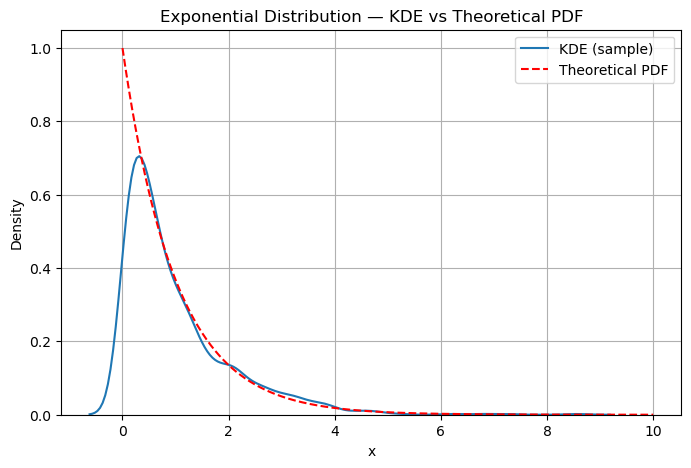

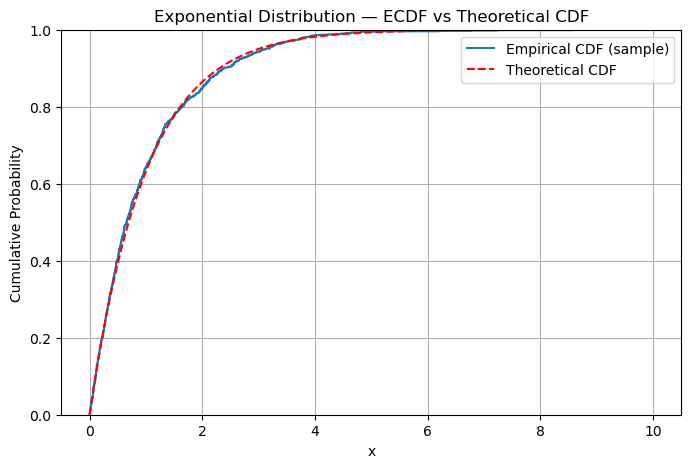

In [187]:
# Parameters
np.random.seed(0)
lambda_val = 1.0  # rate parameter

# Generate sample
samples = np.random.exponential(scale=1/lambda_val, size=1000)

# Theoretical PDF and CDF
x = np.linspace(0, 10, 500)
pdf_theoretical = lambda_val * np.exp(-lambda_val * x)
cdf_theoretical = 1 - np.exp(-lambda_val * x)

# Plot KDE vs PDF
plt.figure(figsize=(8, 5))
sns.kdeplot(samples, label="KDE (sample)", bw_adjust=0.8)
plt.plot(x, pdf_theoretical, 'r--', label="Theoretical PDF")
plt.title("Exponential Distribution — KDE vs Theoretical PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Plot ECDF vs CDF
plt.figure(figsize=(8, 5))
sns.ecdfplot(samples, label="Empirical CDF (sample)")
plt.plot(x, cdf_theoretical, 'r--', label="Theoretical CDF")
plt.title("Exponential Distribution — ECDF vs Theoretical CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

## Negative Binomial (similar to Poisson): 
The probability mass function for positive integers is:
$$
f(k,r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?


**Support:**

$
k = 0, 1, 2, \dots, K
$




**Plot of PMF and CDF**

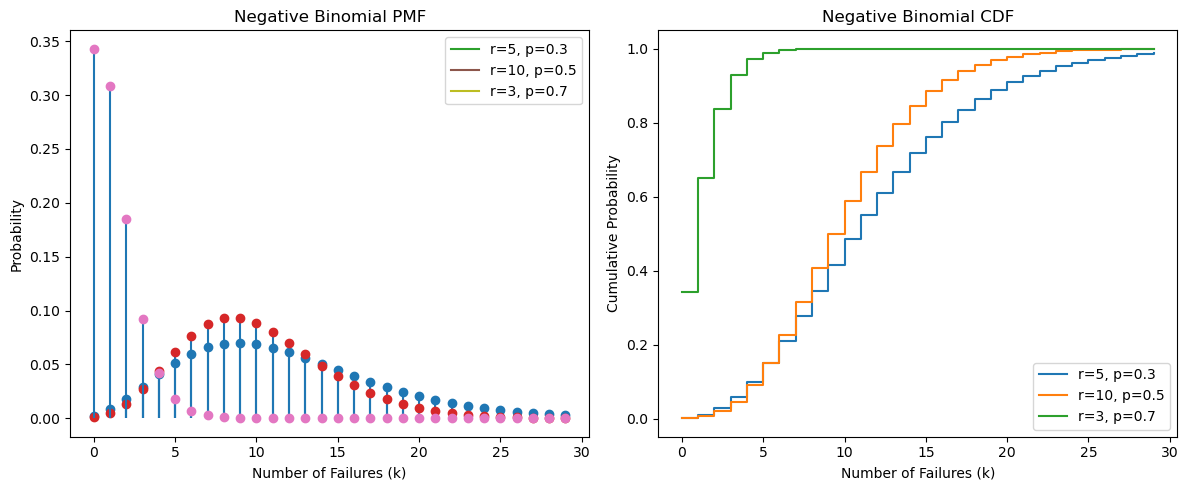

In [188]:
from scipy.stats import nbinom

# Define parameter sets: (r, p)
params = [(5, 0.3), (10, 0.5), (3, 0.7)]

# x-values for plotting (number of failures)
x = np.arange(0, 30)  # adjust max depending on r and p

plt.figure(figsize=(12, 5))

# Plot PMFs
plt.subplot(1, 2, 1)
for r, p in params:
    pmf = nbinom.pmf(x, r, p)
    plt.stem(x, pmf, linefmt='-', markerfmt='o', basefmt=' ')
    plt.plot([], [], label=f"r={r}, p={p}")  # add legend entry
plt.title("Negative Binomial PMF")
plt.xlabel("Number of Failures (k)")
plt.ylabel("Probability")
plt.legend()

# Plot CDFs
plt.subplot(1, 2, 2)
for r, p in params:
    cdf = nbinom.cdf(x, r, p)
    plt.step(x, cdf, where='post', label=f"r={r}, p={p}")
plt.title("Negative Binomial CDF")
plt.xlabel("Number of Failures (k)")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()


**Sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution KDE and ECDF plotsvisually compared with the theoretical pdf/cdf**


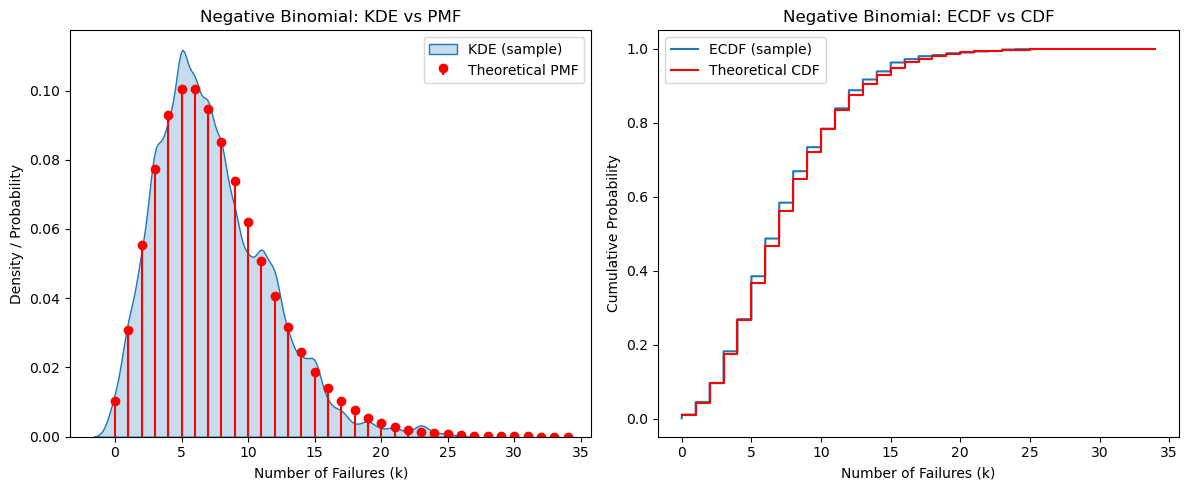

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import seaborn as sns

# Parameters for the negative binomial
r, p = 5, 0.4  # number of successes, success probability
n_samples = 1000

# Take 1000 draws
samples = nbinom.rvs(r, p, size=n_samples)

# x-values for theoretical curves
x = np.arange(0, max(samples)+10)

# Theoretical PMF and CDF
pmf_theoretical = nbinom.pmf(x, r, p)
cdf_theoretical = nbinom.cdf(x, r, p)

# Plot KDE vs theoretical PMF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(samples, bw_adjust=0.5, fill=True, label='KDE (sample)')
plt.stem(x, pmf_theoretical, linefmt='r-', markerfmt='ro', basefmt=' ', label='Theoretical PMF')
plt.title("Negative Binomial: KDE vs PMF")
plt.xlabel("Number of Failures (k)")
plt.ylabel("Density / Probability")
plt.legend()

# Plot ECDF vs theoretical CDF
plt.subplot(1, 2, 2)
# Empirical CDF
sorted_samples = np.sort(samples)
ecdf = np.arange(1, n_samples+1) / n_samples
plt.step(sorted_samples, ecdf, where='post', label='ECDF (sample)')
# Theoretical CDF
plt.step(x, cdf_theoretical, where='post', color='r', label='Theoretical CDF')
plt.title("Negative Binomial: ECDF vs CDF")
plt.xlabel("Number of Failures (k)")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()


## Categorical (similar to Bernoulli): 
The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.

**Support:**

$
k = 0, 1, 2, \dots, K
$




**Plot of the density and distribution of a categorical distribution with different parameters**

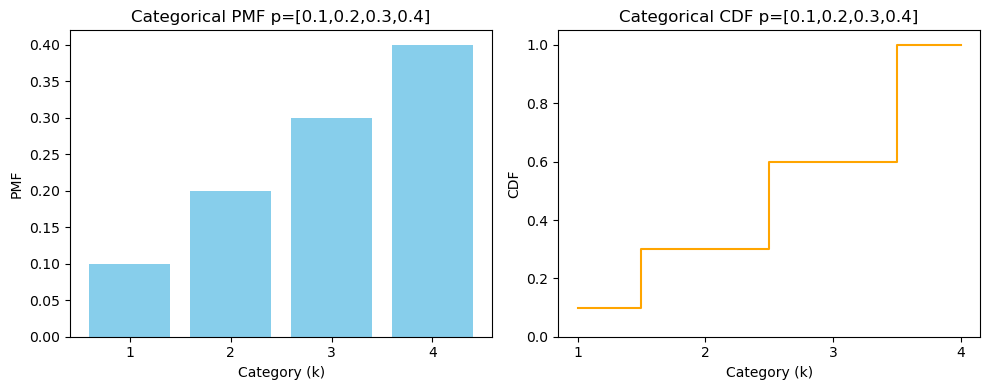

In [190]:
def plot_categorical(p, title_suffix=""):
    """
    p: list or array of probabilities [p1, p2, ..., pK]
    """
    K = len(p)
    k = np.arange(1, K+1)
    
    # PMF
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.bar(k, p, color='skyblue')
    plt.xlabel("Category (k)")
    plt.ylabel("PMF")
    plt.title(f"Categorical PMF {title_suffix}")
    plt.xticks(k)
    
    # CDF
    cdf = np.cumsum(p)
    plt.subplot(1,2,2)
    plt.step(k, cdf, where='mid', color='orange')
    plt.xlabel("Category (k)")
    plt.ylabel("CDF")
    plt.title(f"Categorical CDF {title_suffix}")
    plt.xticks(k)
    plt.ylim(0,1.05)
    
    plt.tight_layout()
    plt.show()

# Example usage with different parameter sets
plot_categorical([0.1, 0.2, 0.3, 0.4], "p=[0.1,0.2,0.3,0.4]")



- Bars increase from 0.1 → 0.4 → right-skewed

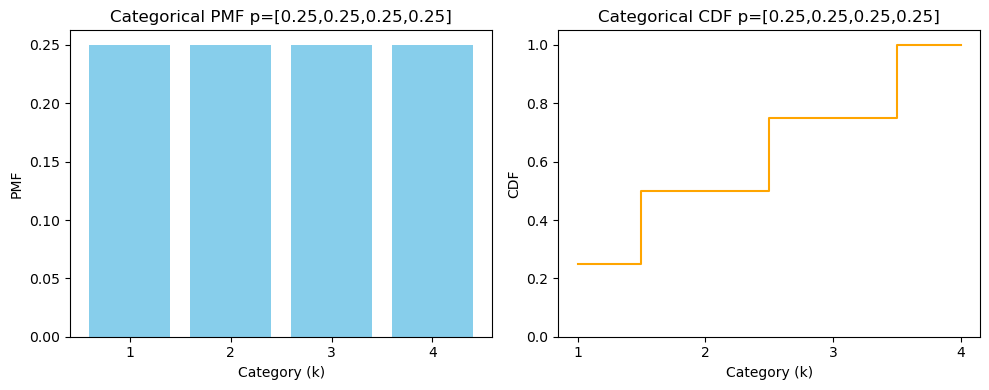

In [191]:
plot_categorical([0.25, 0.25, 0.25, 0.25], "p=[0.25,0.25,0.25,0.25]")


- Flat bars → all categories equally likely

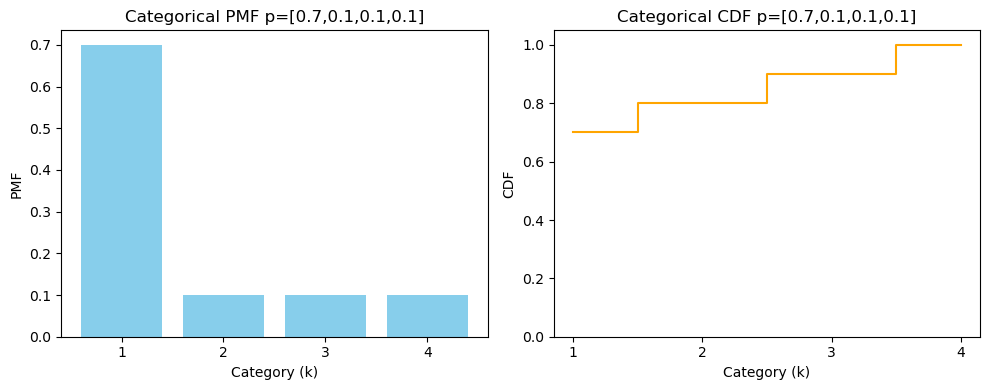

In [192]:
plot_categorical([0.7, 0.1, 0.1, 0.1], "p=[0.7,0.1,0.1,0.1]")

- First bar dominates → most probability on category 1

## Metabric Example

- Survival times might roughly follow an **exponential-like distribution**



In [193]:
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

'data'

In [194]:
import pandas as pd
df = pd.read_csv('data/metabric.csv')

In [195]:
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [196]:
df['Overall Survival Status'].value_counts(dropna=False)

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [197]:
df['Overall Survival (Months)'].describe()

count    1343.000000
mean      129.094291
std        78.290236
min         0.100000
25%        62.700000
50%       118.533333
75%       191.200000
max       351.000000
Name: Overall Survival (Months), dtype: float64

Number of events: 768
Number of event times: 768
Estimated λ = 0.0099 per month


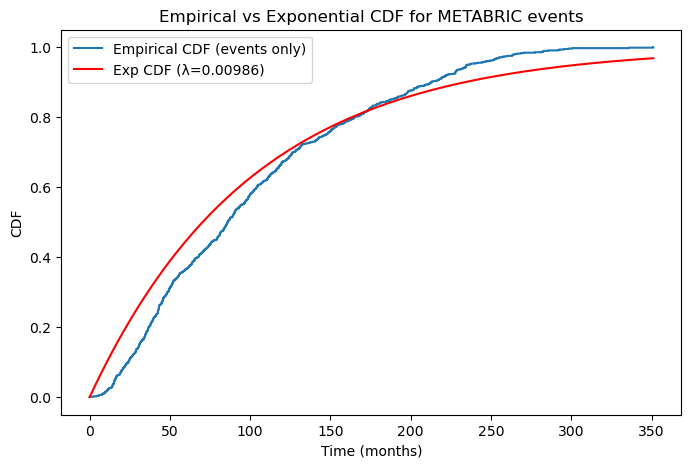

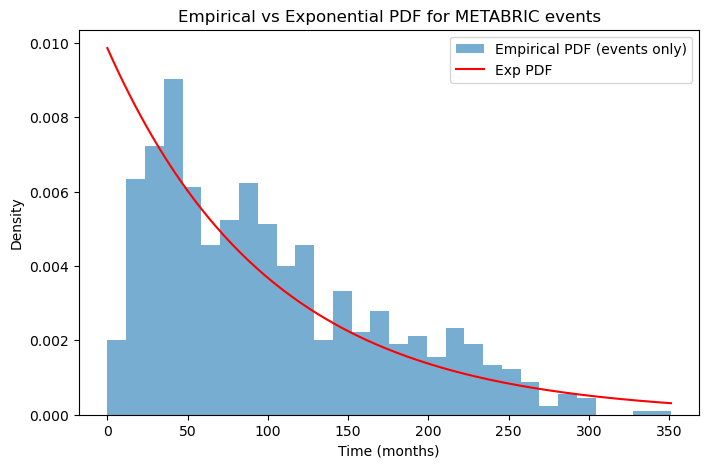

In [198]:

# Survival time and status
T = df["Overall Survival (Months)"].values
# Map event status correctly
E_numeric = df["Overall Survival Status"].str.contains("DECEASED").astype(int)

# Check number of events
print("Number of events:", E_numeric.sum())

# Survival times for events
T_events = T[E_numeric == 1]
print("Number of event times:", len(T_events))

# Focus only on observed events
T_events = T[E_numeric == 1]

# Estimate λ for exponential
lambda_hat = 1.0 / np.mean(T_events)
print(f"Estimated λ = {lambda_hat:.4f} per month")

# Exponential PDF/CDF
def exp_cdf(t, lam):
    return 1.0 - np.exp(-lam * t)

def exp_pdf(t, lam):
    return lam * np.exp(-lam * t)

# Empirical CDF
t_sorted = np.sort(T_events)
empirical_cdf = np.arange(1, len(t_sorted)+1) / len(t_sorted)

t_vals = np.linspace(0, t_sorted.max(), 200)

# Plot CDF
plt.figure(figsize=(8,5))
plt.step(t_sorted, empirical_cdf, where='post', label="Empirical CDF (events only)")
plt.plot(t_vals, exp_cdf(t_vals, lambda_hat), label=f"Exp CDF (λ={lambda_hat:.3g})", color='red')
plt.xlabel("Time (months)")
plt.ylabel("CDF")
plt.legend()
plt.title("Empirical vs Exponential CDF for METABRIC events")
plt.show()

# Plot PDF
plt.figure(figsize=(8,5))
plt.hist(T_events, bins=30, density=True, alpha=0.6, label="Empirical PDF (events only)")
plt.plot(t_vals, exp_pdf(t_vals, lambda_hat), label="Exp PDF", color='red')
plt.xlabel("Time (months)")
plt.ylabel("Density")
plt.legend()
plt.title("Empirical vs Exponential PDF for METABRIC events")
plt.show()
